In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# Let's Clean Some Data

Fivethirtyeight has some great data sets and this is one of them. In July 2014, before the third Star Wars trilogy was released, they decided to survey Americans to see which of the first six movies was their favorite. Let's take a look at the results. Some light cleaning should make it more usable!

In [2]:
# import libraries and csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [3]:
# explore the data frame
display(star_wars.head(2))
display(star_wars.columns)
display(star_wars.shape)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central


Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

(1186, 38)

In [4]:
# rename columns
new_columns = {"Have you seen any of the 6 films in the Star Wars franchise?":"Seen any of the first 6 Star Wars movies?",
               "Do you consider yourself to be a fan of the Star Wars film franchise?":"Fan of the Star Wars franchise?",
               "Which of the following Star Wars films have you seen? Please select all that apply." : "seen_ep_1",
               "Unnamed: 4" : "seen_ep_2",
               "Unnamed: 5" : "seen_ep_3",
               "Unnamed: 6" : "seen_ep_4",
               "Unnamed: 7" : "seen_ep_5",
               "Unnamed: 8" : "seen_ep_6",
               "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.":"rank_ep_1",
               "Unnamed: 10":"rank_ep_2",
               "Unnamed: 11":"rank_ep_3",
               "Unnamed: 12":"rank_ep_4",
               "Unnamed: 13":"rank_ep_5",
               "Unnamed: 14":"rank_ep_6"}

star_wars = star_wars.rename(columns = new_columns)

In [5]:
# value counts for columns 1:3
print(star_wars["Seen any of the first 6 Star Wars movies?"].value_counts(dropna=False))
print(star_wars["Fan of the Star Wars franchise?"].value_counts(dropna=False))
print(star_wars["seen_ep_1"].value_counts(dropna=False))

Yes    936
No     250
Name: Seen any of the first 6 Star Wars movies?, dtype: int64
Yes    552
NaN    350
No     284
Name: Fan of the Star Wars franchise?, dtype: int64
Star Wars: Episode I  The Phantom Menace    673
NaN                                         513
Name: seen_ep_1, dtype: int64


In [6]:
# switch values to boolean for columns 1:2
yes_no_bool = {"Yes":True, "No":False}
star_wars["Seen any of the first 6 Star Wars movies?"] = star_wars["Seen any of the first 6 Star Wars movies?"].map(yes_no_bool)
star_wars["Fan of the Star Wars franchise?"] = star_wars["Fan of the Star Wars franchise?"].map(yes_no_bool)


# switch values to boolean for columns 3:9
watch_bool = {"Star Wars: Episode I  The Phantom Menace" : True,
              "Star Wars: Episode II  Attack of the Clones" : True,
              "Star Wars: Episode III  Revenge of the Sith" : True,
              "Star Wars: Episode IV  A New Hope" : True,
              "Star Wars: Episode V The Empire Strikes Back" : True,
              "Star Wars: Episode VI Return of the Jedi" : True,
              np.NaN : False}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(watch_bool)

# value counts for columns 1:3
print(star_wars["Seen any of the first 6 Star Wars movies?"].value_counts(dropna=False))
print(star_wars["Fan of the Star Wars franchise?"].value_counts(dropna=False))
display(star_wars.iloc[:,3].value_counts(dropna=False))

True     936
False    250
Name: Seen any of the first 6 Star Wars movies?, dtype: int64
True     552
NaN      350
False    284
Name: Fan of the Star Wars franchise?, dtype: int64


True     673
False    513
Name: seen_ep_1, dtype: int64

In [7]:
# convert rankings to float
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

# star_wars.columns[9].dtype # why does this work sometimes?
star_wars.iloc[:,9].dtype

dtype('float64')

# Closer Look
Now that the columns are renamed and the values have been changed to True/False we can start analyzing the data.

In [8]:
# get average value for seen any, fan, which episode, rankings by episode
means = star_wars.iloc[:,1:15].mean()
display(means)

# totals
sums = star_wars.iloc[:,1:9].sum()
display(sums)

Seen any of the first 6 Star Wars movies?    0.789207
Fan of the Star Wars franchise?              0.660287
seen_ep_1                                    0.567454
seen_ep_2                                    0.481450
seen_ep_3                                    0.463744
seen_ep_4                                    0.511804
seen_ep_5                                    0.639123
seen_ep_6                                    0.622260
rank_ep_1                                    3.732934
rank_ep_2                                    4.087321
rank_ep_3                                    4.341317
rank_ep_4                                    3.272727
rank_ep_5                                    2.513158
rank_ep_6                                    3.047847
dtype: float64

Seen any of the first 6 Star Wars movies?    936
Fan of the Star Wars franchise?              552
seen_ep_1                                    673
seen_ep_2                                    571
seen_ep_3                                    550
seen_ep_4                                    607
seen_ep_5                                    758
seen_ep_6                                    738
dtype: object

In [9]:
# math check :)
display(star_wars["Seen any of the first 6 Star Wars movies?"].value_counts(dropna=False))

display(star_wars["Fan of the Star Wars franchise?"].value_counts(dropna=False))
display(552/(552+284))

True     936
False    250
Name: Seen any of the first 6 Star Wars movies?, dtype: int64

True     552
NaN      350
False    284
Name: Fan of the Star Wars franchise?, dtype: int64

0.6602870813397129

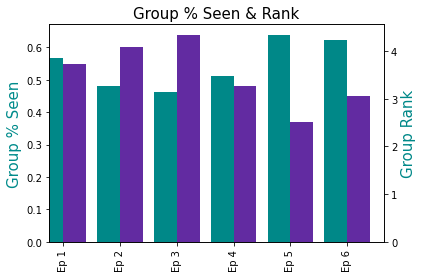

In [37]:
# % seen and rank (1 is good for rank!)
seen = list(means.iloc[2:8])
rank = list(means.iloc[8:14])
ep_index = ["Ep 1","Ep 2","Ep 3","Ep 4","Ep 5","Ep 6"]
bar_df = pd.DataFrame({"Seen":seen, "Rank":rank}, index=ep_index)

fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx() 
width = 0.4
bar_df.Seen.plot(kind="bar", color="#008888", ax=ax, width=width, position=1)
bar_df.Rank.plot(kind="bar", color="#622BA1", ax=ax2, width=width, position=0)
ax.set_ylabel("Group % Seen", color="008888", size=15)
ax2.set_ylabel("Group Rank", color="#622BA1", size=15)
plt.title("Group % Seen & Rank", size=15)
# plt.savefig("group_seen_rank.jpg")
plt.show()

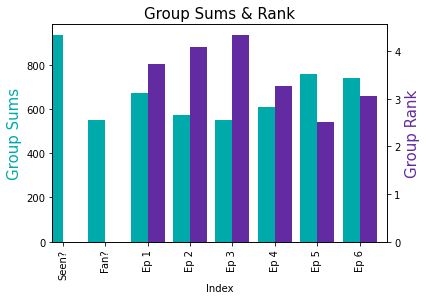

In [39]:
# total seen and rank (1 is good for rank!)
new_ep_index = ["Seen?","Fan?","Ep 1","Ep 2","Ep 3","Ep 4","Ep 5","Ep 6"]
osums = list(sums)
orank = list(means.iloc[8:14])
obar_dict = {"Index":new_ep_index, "Sums":osums, "Rank":orank}
obar_df = pd.DataFrame({ key:pd.Series(value) for key, value in obar_dict.items() }) # makes df from unequal length k:v pairs
obar_df = obar_df.set_index("Index") # kluldgy way to get the index correct
obar_df["Rank"] = obar_df["Rank"].shift(periods=2)

fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx() 
width = 0.4
obar_df.Sums.plot(kind="bar", color="#00AAAA", ax=ax, width=width, position=1)
obar_df.Rank.plot(kind="bar", color="#622BA1", ax=ax2, width=width, position=0)
ax.set_ylabel("Group Sums", color="#00AAAA", size=15)
ax2.set_ylabel("Group Rank", color="#622BA1", size=15)
plt.title("Group Sums & Rank", size=15)
# plt.savefig("group_sums_rank.jpg")
plt.show()


In [12]:
# fan_nan
fan_nan = star_wars[(star_wars.iloc[:,1] == True) & (star_wars.iloc[:,2].isna())]
display(fan_nan.head())
display(fan_nan.shape)

,RespondentID,Seen any of the first 6 Star Wars movies?,Fan of the Star Wars franchise?,seen_ep_1,seen_ep_2,seen_ep_3,seen_ep_4,seen_ep_5,seen_ep_6,rank_ep_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
10,3292637870,True,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,3291669388,True,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,3291570206,True,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,3291469991,True,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,3291420030,True,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(100, 38)

# Impressions
* The original dataset contains 1186 rows of unique respondents. 78% of them have seen a Star Wars movie and 66% consider themselves fans of the franchise. That's pretty good!

* The bar chart shows a pretty even distribution of which movies the respondents have seen. The most seen are Episodes V, VI, and I respectively.

* The favorite is Episode V, with VI and IV coming in close second and third ranks. Episodes II and III are not popular...

* There are 100 respondents who have seen some of the movies but their answer to if they were a fan is set to `NaN`. This sets all the other values in the row to `NaN` as well. There's no indication as to why they are blank.

# Same Stuff but Females

In [13]:
# female group
star_wars_f = star_wars[star_wars["Gender"] == "Female"]

# means
f_means = star_wars_f.iloc[:,1:15].mean()
display(f_means)

# sums
f_sums = star_wars_f.iloc[:,1:9].sum()
display(f_sums)

Seen any of the first 6 Star Wars movies?    0.723133
Fan of the Star Wars franchise?              0.599496
seen_ep_1                                    0.542805
seen_ep_2                                    0.431694
seen_ep_3                                    0.404372
seen_ep_4                                    0.464481
seen_ep_5                                    0.642987
seen_ep_6                                    0.615665
rank_ep_1                                    3.429293
rank_ep_2                                    3.954660
rank_ep_3                                    4.418136
rank_ep_4                                    3.544081
rank_ep_5                                    2.569270
rank_ep_6                                    3.078086
dtype: float64

Seen any of the first 6 Star Wars movies?    397
Fan of the Star Wars franchise?              238
seen_ep_1                                    298
seen_ep_2                                    237
seen_ep_3                                    222
seen_ep_4                                    255
seen_ep_5                                    353
seen_ep_6                                    338
dtype: object

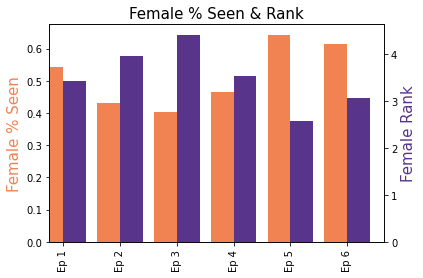

In [42]:
# FEMALE % seen and rank (1 is good for rank!)
f_seen = list(f_means.iloc[2:8])
f_rank = list(f_means.iloc[8:14])

f_bar_df = pd.DataFrame({"F_Seen":f_seen, "F_Rank":f_rank}, index=ep_index)

fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx() 
width = 0.4
f_bar_df.F_Seen.plot(kind="bar", color="#F08351", ax=ax, width=width, position=1)
f_bar_df.F_Rank.plot(kind="bar", color="#58348B", ax=ax2, width=width, position=0)
ax.set_ylabel("Female % Seen", color="#F08351", size=15)
ax2.set_ylabel("Female Rank", color="#58348B", size=15)
plt.title("Female % Seen & Rank", size=15)
# plt.savefig("female_seen_rank.jpg")
plt.show()

In [45]:
print(matplotlib.colors.cnames["slateblue"])

#6A5ACD


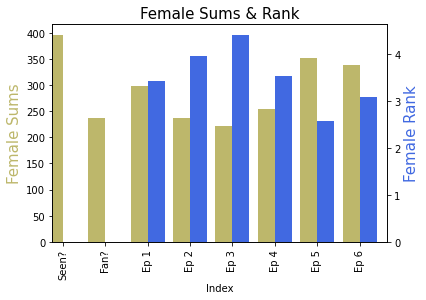

In [15]:
# FEMALE total seen and rank (1 is good for rank!)
# new_ep_index = ["Seen any?","Fan of any?","Ep 1","Ep 2","Ep 3","Ep 4","Ep 5","Ep 6"]
f_osums = list(f_sums)
f_orank = list(f_means.iloc[8:14])
f_obar_dict = {"Index":new_ep_index, "F_Sums":f_osums, "F_Rank":f_orank}
f_obar_df = pd.DataFrame({ key:pd.Series(value) for key, value in f_obar_dict.items() }) # makes df from unequal length k:v pairs
f_obar_df = f_obar_df.set_index("Index") # kluldgy way to get the index correct
f_obar_df["F_Rank"] = f_obar_df["F_Rank"].shift(periods=2) # kludgy way to deal with NaN

fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx() 
width = 0.4
f_obar_df.F_Sums.plot(kind="bar", color="darkkhaki", ax=ax, width=width, position=1)
f_obar_df.F_Rank.plot(kind="bar", color="#58348B", ax=ax2, width=width, position=0)
ax.set_ylabel("Female Sums", color="darkkhaki", size=15)
ax2.set_ylabel("Female Rank", color="#58348B", size=15)
plt.title("Female Sums & Rank", size=15)
# plt.savefig("female_sums_rank.jpg")
plt.show()

# Same Stuff but Males

In [16]:
# male group
star_wars_m = star_wars[star_wars["Gender"] == "Male"]

# means
m_means = star_wars_m.iloc[:,1:15].mean()
display(m_means)

# sums
m_sums = star_wars_m.iloc[:,1:9].sum()
display(m_sums)

Seen any of the first 6 Star Wars movies?    0.851107
Fan of the Star Wars franchise?              0.716312
seen_ep_1                                    0.726358
seen_ep_2                                    0.649899
seen_ep_3                                    0.637827
seen_ep_4                                    0.688129
seen_ep_5                                    0.788732
seen_ep_6                                    0.778672
rank_ep_1                                    4.037825
rank_ep_2                                    4.224586
rank_ep_3                                    4.274882
rank_ep_4                                    2.997636
rank_ep_5                                    2.458629
rank_ep_6                                    3.002364
dtype: float64

Seen any of the first 6 Star Wars movies?    423
Fan of the Star Wars franchise?              303
seen_ep_1                                    361
seen_ep_2                                    323
seen_ep_3                                    317
seen_ep_4                                    342
seen_ep_5                                    392
seen_ep_6                                    387
dtype: object

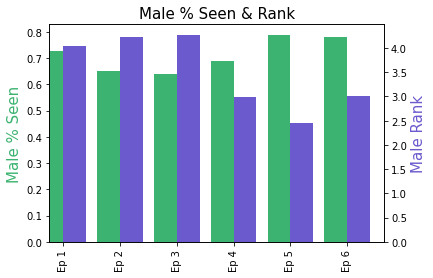

In [17]:
# MALE % seen and rank (1 is good for rank!)
m_seen = list(m_means.iloc[2:8])
m_rank = list(m_means.iloc[8:14])

m_bar_df = pd.DataFrame({"M_Seen":m_seen, "M_Rank":m_rank}, index=ep_index)

fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx() 
width = 0.4
m_bar_df.M_Seen.plot(kind="bar", color="mediumseagreen", ax=ax, width=width, position=1)
m_bar_df.M_Rank.plot(kind="bar", color="slateblue", ax=ax2, width=width, position=0)
ax.set_ylabel("Male % Seen", color="mediumseagreen", size=15)
ax2.set_ylabel("Male Rank", color="slateblue", size=15)
plt.title("Male % Seen & Rank", size=15)
# plt.savefig("male_seen_rank.jpg")
plt.show()

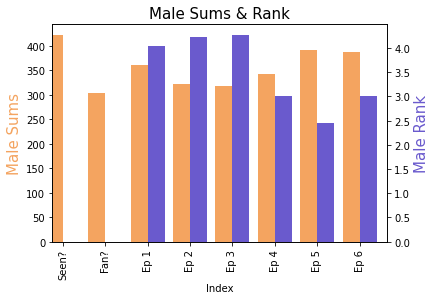

In [18]:
# MEN total seen and rank (1 is good for rank!)
# new_ep_index = ["Seen any?","Fan of any?","Ep 1","Ep 2","Ep 3","Ep 4","Ep 5","Ep 6"]
m_osums = list(m_sums)
m_orank = list(m_means.iloc[8:14])
m_obar_dict = {"Index":new_ep_index, "M_Sums":m_osums, "M_Rank":m_orank}
m_obar_df = pd.DataFrame({ key:pd.Series(value) for key, value in m_obar_dict.items() }) # makes df from unequal length k:v pairs
m_obar_df = m_obar_df.set_index("Index") # kluldgy way to get the index correct
m_obar_df["M_Rank"] = m_obar_df["M_Rank"].shift(periods=2) # kludgy way to deal with NaN

fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx() 
width = 0.4
m_obar_df.M_Sums.plot(kind="bar", color="sandybrown", ax=ax, width=width, position=1)
m_obar_df.M_Rank.plot(kind="bar", color="slateblue", ax=ax2, width=width, position=0)
ax.set_ylabel("Male Sums", color="sandybrown", size=15)
ax2.set_ylabel("Male Rank", color="slateblue", size=15)
plt.title("Male Sums & Rank", size=15)
# plt.savefig("male_sums_rank.jpg")
plt.show()

# Looking At All Three

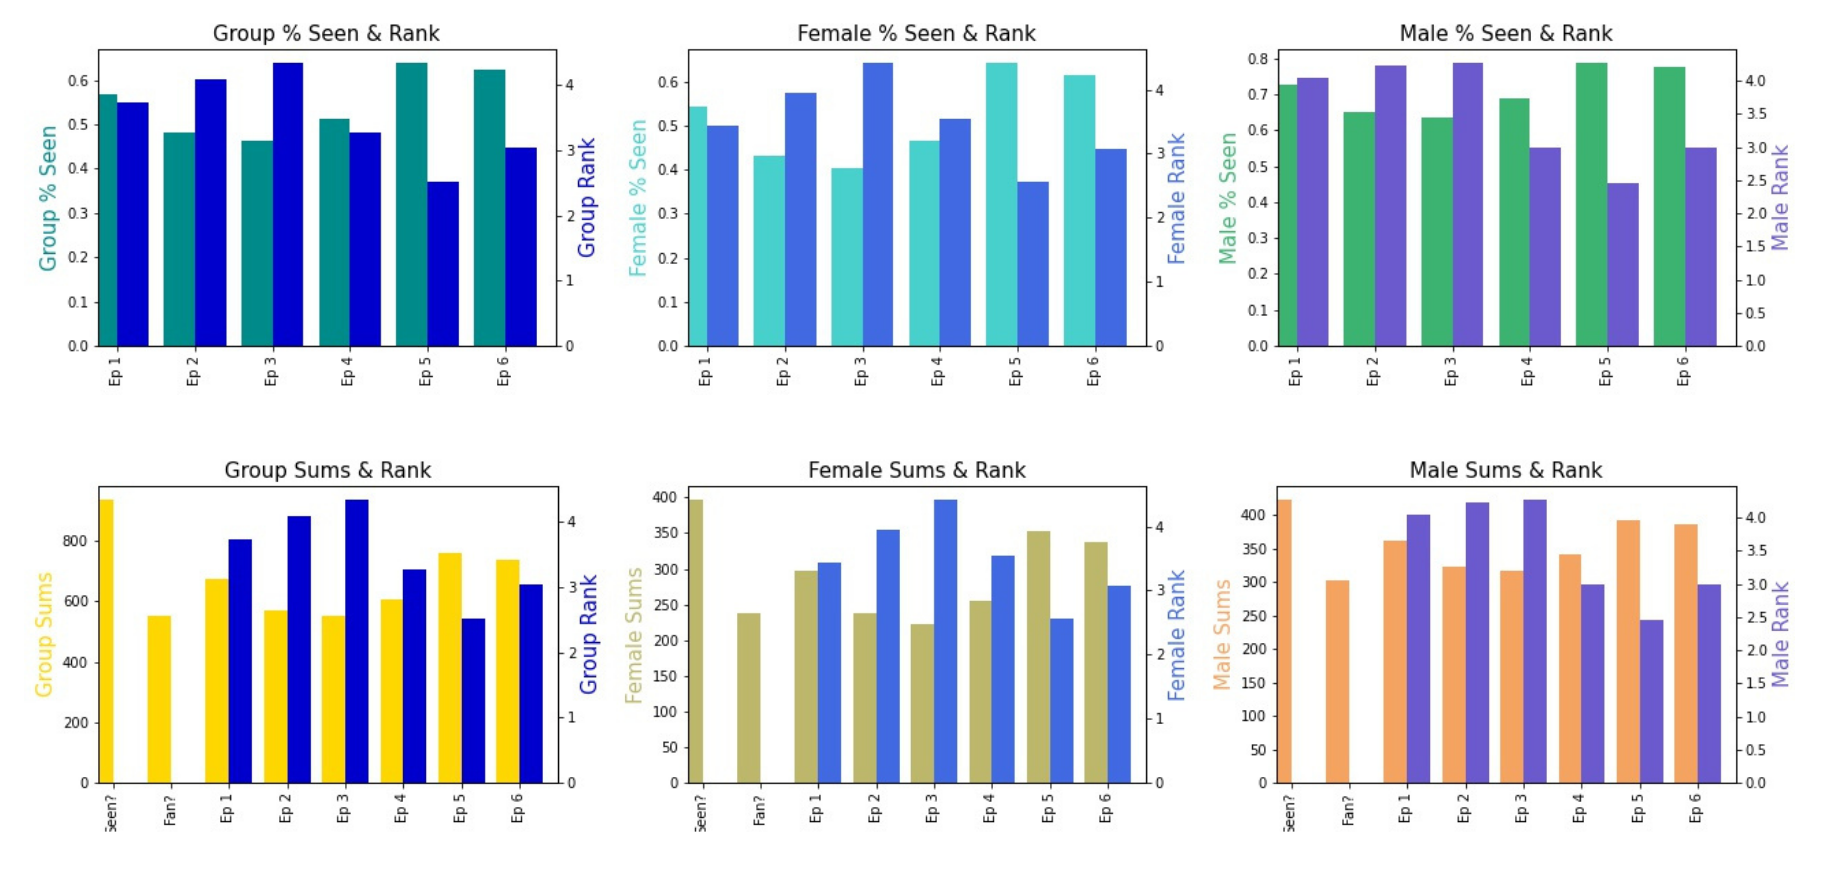

In [19]:
from IPython import display
display.Image("./image.png")

In [20]:
gender_means = star_wars.groupby("Gender").mean()
gender_means

,RespondentID,Seen any of the first 6 Star Wars movies?,seen_ep_1,seen_ep_2,seen_ep_3,seen_ep_4,seen_ep_5,seen_ep_6,rank_ep_1,rank_ep_2,rank_ep_3,rank_ep_4,rank_ep_5,rank_ep_6
Gender,,,,,,,,,,,,,,
Female,3.289817e+09,0.723133,0.542805,0.431694,0.404372,0.464481,0.642987,0.615665,3.429293,3.954660,4.418136,3.544081,2.569270,3.078086
Male,3.290478e+09,0.851107,0.726358,0.649899,0.637827,0.688129,0.788732,0.778672,4.037825,4.224586,4.274882,2.997636,2.458629,3.002364


In [21]:
gender_sums = star_wars.groupby("Gender").sum()
gender_sums

,RespondentID,Seen any of the first 6 Star Wars movies?,seen_ep_1,seen_ep_2,seen_ep_3,seen_ep_4,seen_ep_5,seen_ep_6,rank_ep_1,rank_ep_2,rank_ep_3,rank_ep_4,rank_ep_5,rank_ep_6
Gender,,,,,,,,,,,,,,
Female,1806109676556,397,298,237,222,255,353,338,1358.0,1570.0,1754.0,1407.0,1020.0,1222.0
Male,1635367528067,423,361,323,317,342,392,387,1708.0,1787.0,1804.0,1268.0,1040.0,1270.0


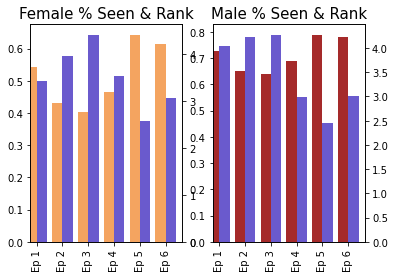

In [43]:
# FEMALE % seen and rank
fig = plt.figure()

ax = fig.add_subplot(121)
ax2 = ax.twinx() 
width = 0.4
gender_means.iloc[0,2:8].plot(kind="bar", color="sandybrown", ax=ax, width=width, position=1)
gender_means.iloc[0,8:14].plot(kind="bar", color="slateblue", ax=ax2, width=width, position=0)
ax.set_xticks([0,1,2,3,4,5])
ax.set_xticklabels(ep_index)
plt.title("Female % Seen & Rank", size=15)

ax = fig.add_subplot(122)
ax2 = ax.twinx() 
width = 0.4
gender_means.iloc[1,2:8].plot(kind="bar", color="brown", ax=ax, width=width, position=1)
gender_means.iloc[1,8:14].plot(kind="bar", color="slateblue", ax=ax2, width=width, position=0)
ax.set_xticks([0,1,2,3,4,5])
ax.set_xticklabels(ep_index)
plt.title("Male % Seen & Rank", size=15)

ax = fig.add_subplot(122)
ax2 = ax.twinx() 
width = 0.4
gender_means.iloc[1,2:8].plot(kind="bar", color="brown", ax=ax, width=width, position=1)
gender_means.iloc[1,8:14].plot(kind="bar", color="slateblue", ax=ax2, width=width, position=0)
ax.set_xticks([0,1,2,3,4,5])
ax.set_xticklabels(ep_index)
plt.title("Male % Seen & Rank", size=15)

plt.show()

In [23]:
# trekkies = star_wars[star_wars.iloc[:,32] == "Yes"]
trekkies = star_wars.groupby(star_wars.iloc[:,32]).mean()


In [24]:
trekkies

,RespondentID,Seen any of the first 6 Star Wars movies?,seen_ep_1,seen_ep_2,seen_ep_3,seen_ep_4,seen_ep_5,seen_ep_6,rank_ep_1,rank_ep_2,rank_ep_3,rank_ep_4,rank_ep_5,rank_ep_6
Do you consider yourself to be a fan of the Star Trek franchise?,,,,,,,,,,,,,,
No,3.290120e+09,0.644306,0.469579,0.355694,0.344774,0.402496,0.550702,0.521061,3.487864,3.915254,4.278450,3.433414,2.634383,3.244552
Yes,3.290126e+09,0.971897,0.852459,0.786885,0.754098,0.800937,0.929742,0.927400,3.968675,4.255422,4.403382,3.110843,2.407229,2.850602
